# Course Project - Machine Learning with Python: Zero to GBMs

## Introduction

For this course project, I am to apply the machine learning skills covered in the course by training a Machine Learning model om a real-world dataset. These are the steps required to complete the project:

> 1. Pick a large real-world dataset from Kaggle (see the "Recommended Datasets" section below) and download it using opendatasets. Your training set should contain at least 50,000 rows and 5 columns of data.
>
> 2. Read the dataset description, understand the problem statement and describe the modeling objective clearly. You can also browse through existing notebooks created by others for inspiration.
>
> 3. Perform exploratory data analysis, gather insights about the data, perform feature engineering, create a training-validation split, and prepare the data for modeling.
>
> 4. Train & evaluate different machine learning models, tune hyperparameters and reduce overfitting to improve the model.
> 
> 5. Report the final performance of your best model(s), show sample predictions, and save model weights. Summarize your work, share links to references, and suggest ideas for future work.
>
> 6. Publish your Jupyter notebook to Jovian, make a submission below and share your project with the community
>
> <p style="text-align: right">&mdash; <a href="https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model">https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model</a></p>

For step one, as I was browsing Kaggle for datasets, I noticed that Kaggle is running a monthly playground series competition geared towards newcomers to Machine Learning called the the Tabular Playground Series. Since a new contest was about to start, I decided to use the August [competition](https://www.kaggle.com/c/tabular-playground-series-aug-2021) as my dataset.

## Dataset Description

The dataset description from the competition is:

> The dataset is used for this competition is synthetic, but based on a real dataset and generated using a [CTGAN](https://github.com/sdv-dev/CTGAN). The original dataset deals with calculating the loss associated with a loan defaults. Although the features are anonymized, they have properties relating to real-world features.

This dataset, even though it is synthesized from real data and the categories are anonymized, is tasking us to predict the amount of money a lender might lose if a borrower defaults on a loan.

We are to use the data to predict a target `loss` based on the feature columns in the dataset. The evaluation criteria is the Root Mean Squared Error (RMSE) of our predictions on the test data.

From the description, we know that this is a regression problem.

## Data Analysis and Modeling

### Data Download

I'm going to use the opendatasets library to download and extract the dataset being used in the competition.

**Note:** In order to successfully download the data, you need to have a Kaggle Acoount along with your Kaggle API Key and have accepted the competition rules.

In [1]:
import opendatasets as od

In [2]:
dataset_url = 'https://www.kaggle.com/c/tabular-playground-series-aug-2021'

In [3]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fuzzyray
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149M/149M [00:03<00:00, 39.3MB/s]



Extracting archive ./tabular-playground-series-aug-2021/tabular-playground-series-aug-2021.zip to ./tabular-playground-series-aug-2021


### Data Exploration

Import libraries for visualization

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the data and analyze the structure of the downloaded data

In [5]:
import os
os.listdir('tabular-playground-series-aug-2021')

['test.csv', 'train.csv', 'sample_submission.csv']

In [6]:
import pandas as pd

In [7]:
filedir='tabular-playground-series-aug-2021'

In [8]:
train_df = pd.read_csv(filedir + '/train.csv')
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


**The training data contains an `id` column followed by 100 feature columns labled `f0` to `f99` and then the target `loss` column.**

In [9]:
test_df = pd.read_csv(filedir + '/test.csv')
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


**The test data is identical to the training data except it does not contain the target `loss` column.**

In [10]:
submission_df = pd.read_csv(filedir + '/sample_submission.csv')
submission_df.head()

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0


**The submission data contains the same `id` column values with a `loss` column filled with `0`. The goal is to predict the loss against the test data and the submit the predictions with the submission csv file.**

### Dataset insights

Let's look at the columns to gather insights to the data to see what feature engineering and modeling is appropriate for the data.

In [11]:
feature_columns = train_df.columns[1:-1]
feature_df = train_df[feature_columns]
print('Total number of missing features: {}'.format(feature_df.isna().sum().sum()))

Total number of missing features: 0


**There are no missing values in the dataset, so we will not need to do any imputation of data**

In [12]:
set([feature_df[col].dtype for col in feature_df.columns])

{dtype('int64'), dtype('float64')}

Our feature columns are a mix of float64 and int64 columns, Let look at the int64 columns to see if they are possibly categorical columns.

In [13]:
discrete_cols = [col for col in feature_df.columns if feature_df[col].dtype == 'int64']
for col in discrete_cols:
    print('Column: {}\tUnique: {}'.format(col, train_df[col].nunique()))

Column: f1	Unique: 289
Column: f16	Unique: 247476
Column: f27	Unique: 37471
Column: f55	Unique: 4726
Column: f86	Unique: 329


**The integer features have high cardinality, so we will not treat any of the columns as categorical data.**

Let's look at the magnitude of the columns to see if we need scaling of the data

In [14]:
feature_df.describe().T[['mean','std','min','max']].sample(20)

,mean,std,min,max
f77,0.734153,3.344094,-43.048000,51.090000
f43,0.428217,0.182512,-0.058179,0.850681
f49,87.844474,70.327252,-48.143900,516.338000
f4,3595.133426,6072.401061,-7589.280000,37847.500000
f89,7.759941,11.378365,-9.396700,73.116100
f98,1.576900,0.646306,-0.646967,4.492620
f28,5.469358,7.716520,-4.283380,39.953400
f8,16.669745,99.758709,-502.813000,465.956000
f85,4.400483,1.089594,-3.751090,10.413600
f32,-0.018490,0.787275,-1.824650,1.691910


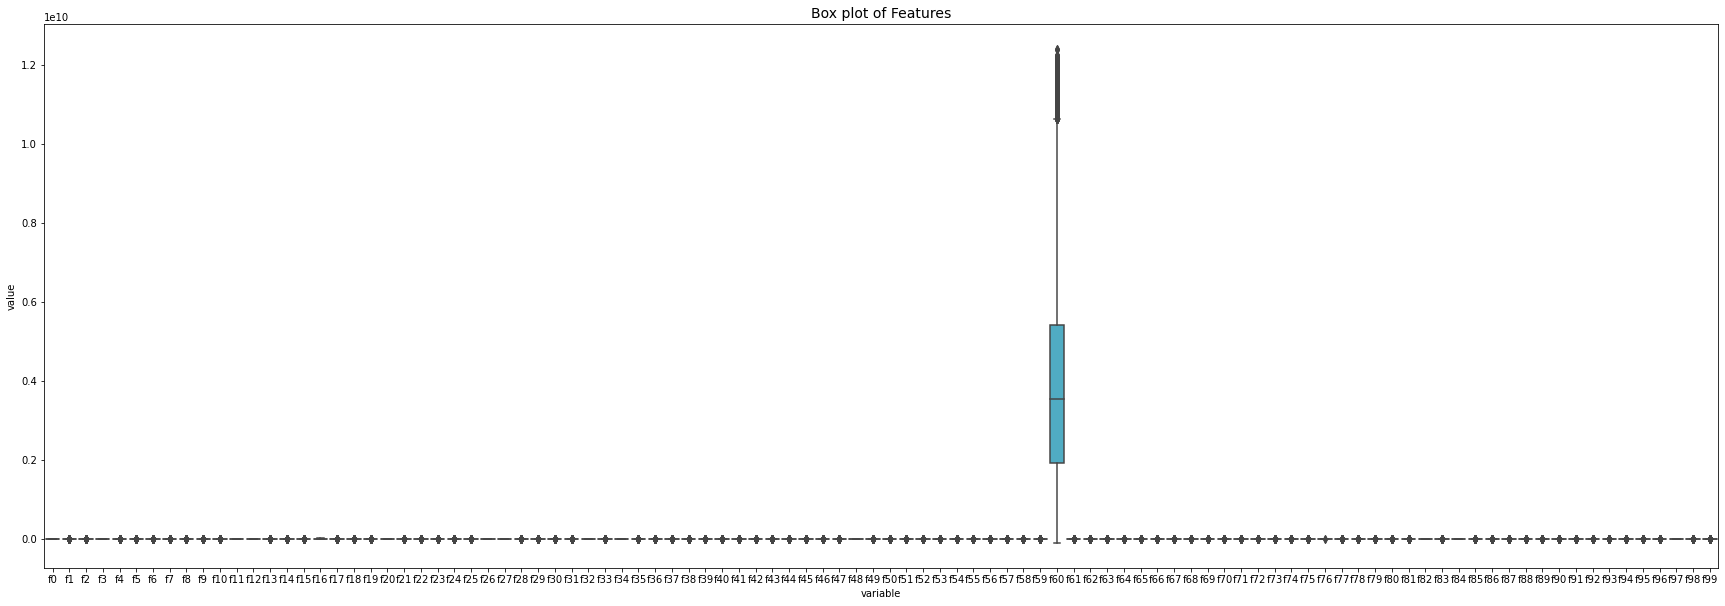

In [15]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data = feature_df.melt()).set_title('Box plot of Features',size=14);

**Our order of magnitude ranges from approximately** `1e0` **to** `1e10`, **we will definitely need to scale our features columns to avoid features from dominating the model.**

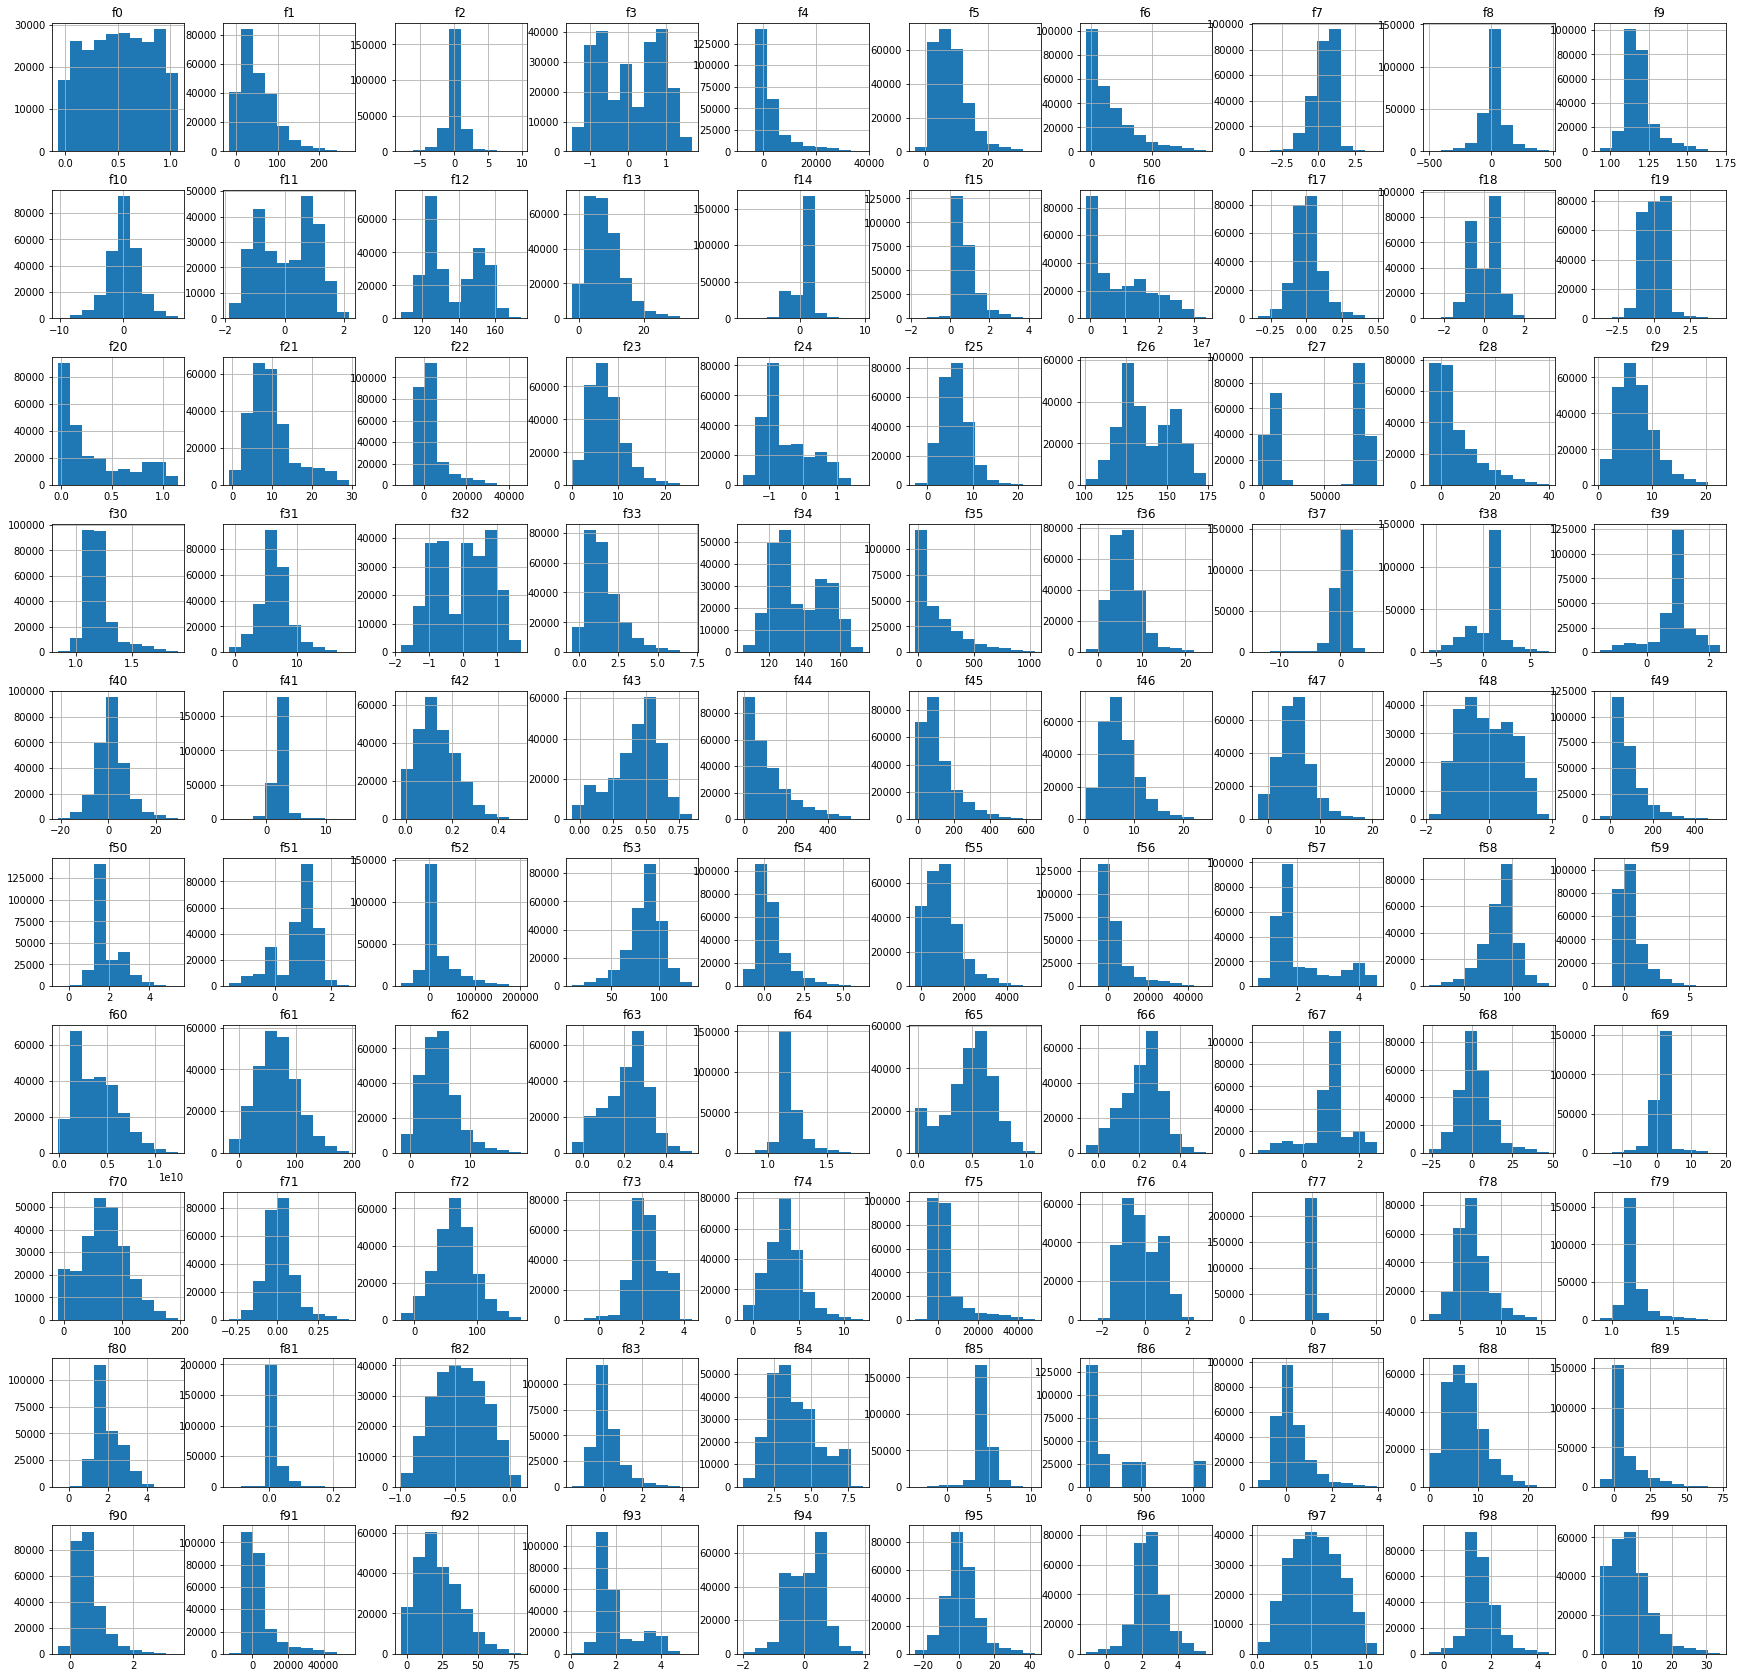

In [16]:
feature_df.hist(figsize=(30,30));

**Most of our features show a normal distribution, although some are skewed and we have a several bimodal and trimodal distributions.**

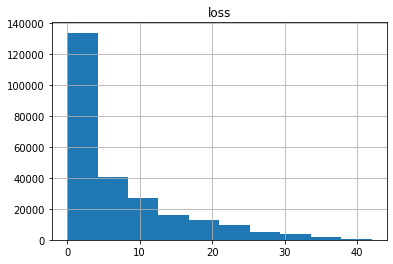

In [17]:
train_df[['loss']].hist();

**The loss distribution is skewed**

### Data Preparation

Create our training and validation sets

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [19]:
input_cols, target_col = train_df.columns[1:-1], train_df.columns[-1]

In [20]:
X, y = train_df[input_cols].copy(), train_df[target_col].copy()

In [21]:
scaler = RobustScaler(unit_variance=True).fit(X[:])
X[:] = scaler.transform(X[:])
X.describe().T[['mean', 'std', 'min', 'max']].sample(20)

,mean,std,min,max
f85,0.096976,1.986068,-14.761389,11.057449
f17,0.099879,1.284247,-4.256380,6.118288
f46,0.171064,1.058483,-1.840692,5.278943
f5,0.142972,1.067306,-2.097978,5.380766
f47,0.052658,1.113400,-2.432435,5.563241
f87,0.272325,1.258746,-2.419838,6.882093
f41,0.057792,2.085339,-14.547982,19.780784
f42,0.142770,0.976231,-1.658442,4.335428
f28,0.491088,1.165036,-0.981375,5.697469
f37,-0.386619,1.461845,-12.102737,4.676336


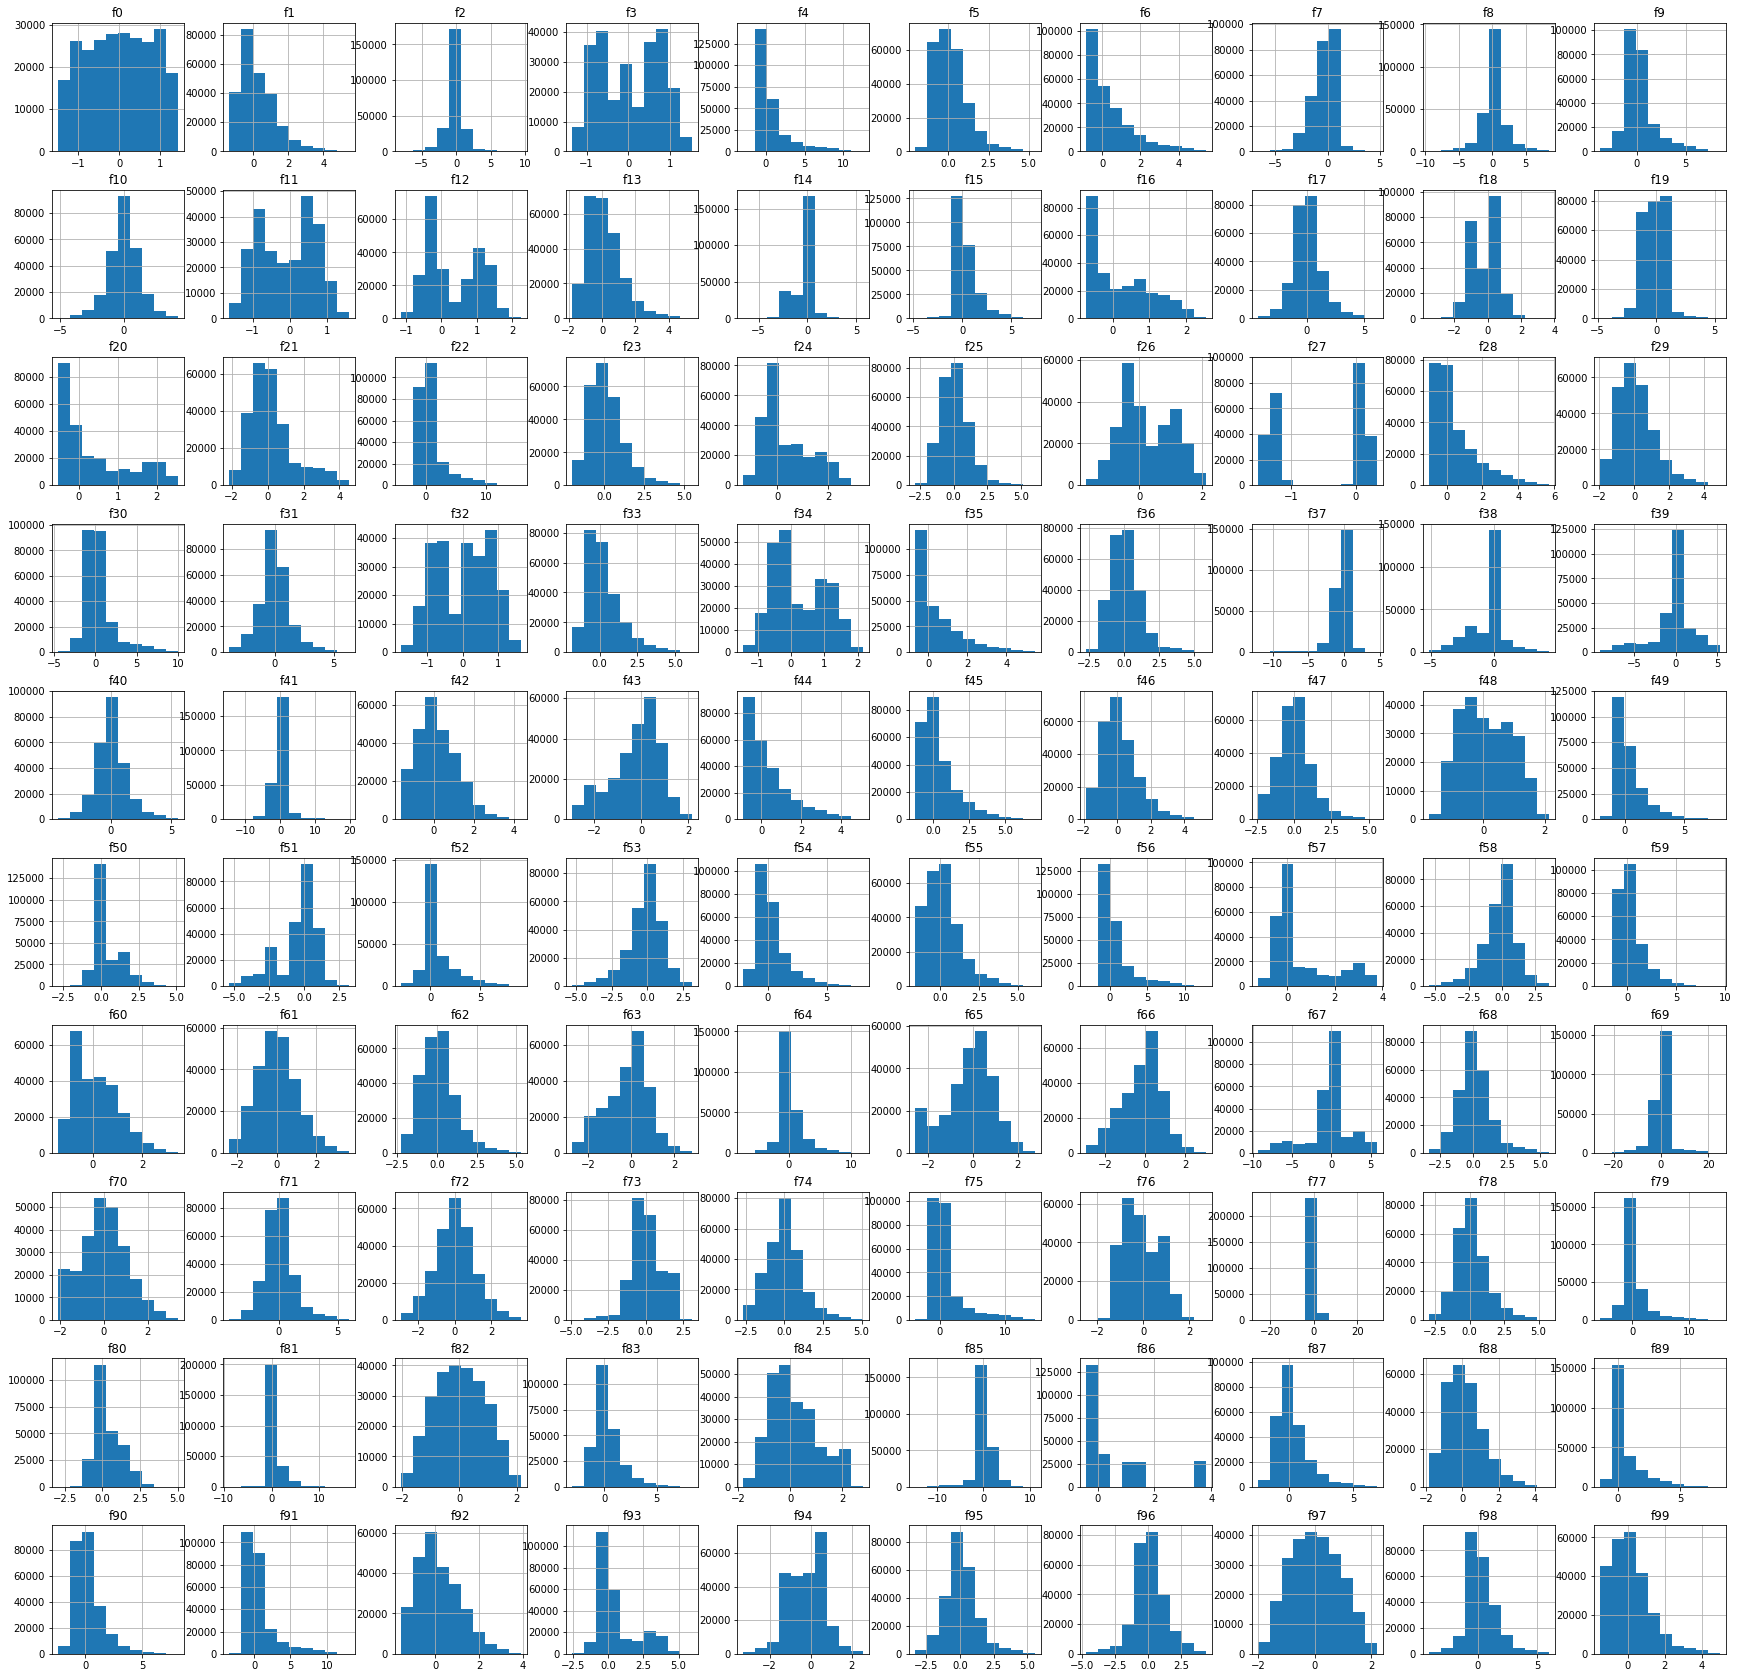

In [22]:
X.hist(figsize=(30,30));

Our histograms of the features look the same but our values have been scaled down to smaller numbers

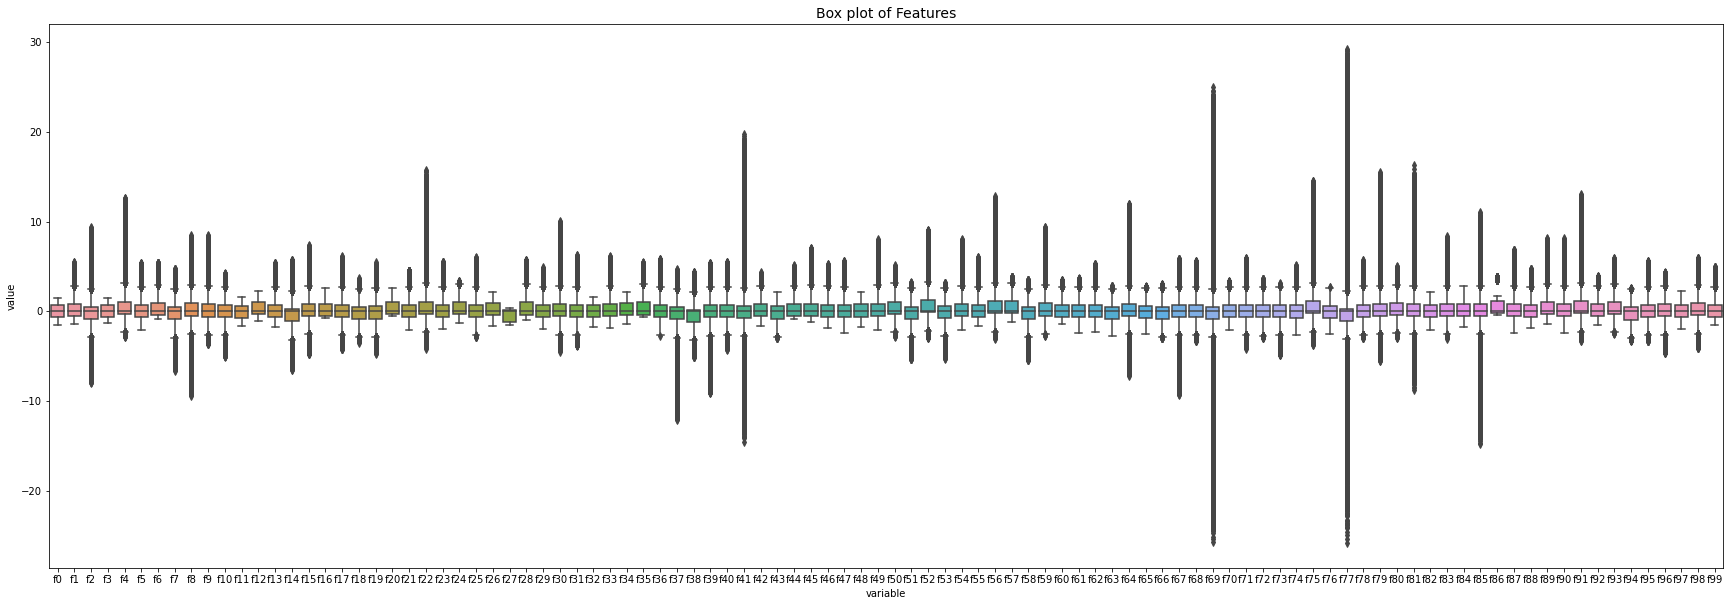

In [23]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data = X.melt()).set_title('Box plot of Features',size=14);

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

## Training and Evaluation of Models

In this section, I'm going train different ML models using models learned during the course.

For each model, I will first run the model using the default hyperparamter values, I will then work on tuning the hyperparameters for that specific model. After hyperparameter tuning, I will then run a final model with the chosen hyperparameters and save the validation RMSE value for comparing the models.

### Helper functions

In [ ]:
# Code block to re-read and reinitialize the training, and validation data, useful if kernel needs to be restarted

import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filedir='tabular-playground-series-aug-2021'
train_df = pd.read_csv(filedir + '/train.csv')

input_cols, target_col = train_df.columns[1:-1], train_df.columns[-1]
X, y = train_df[input_cols].copy(), train_df[target_col].copy()

scaler = RobustScaler(unit_variance=True).fit(X[:])
X[:] = scaler.transform(X[:])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

def test_params(model_class, **params):
    try:
        model = model_class(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    except TypeError:
        try:
            model = model_class(n_jobs=-1, **params).fit(X_train, y_train)
        except TypeError:
            model = model_class(random_state=42, **params).fit(X_train, y_train)
    print(model)
    train_rmse = rmse(model.predict(X_train), y_train)
    val_rmse = rmse(model.predict(X_val), y_val)
    return train_rmse, val_rmse

In [26]:
def test_param_and_plot(model_class, param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(model_class, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    print('Training Errors: {}'.format(train_errors))
    print('Validation Errors: {}'.format(val_errors))

In [27]:
validation_results = {}

### Baseline model

For my baseline model, I'm going to use a model that just predicts the mean of the training loss column as the predicted loss and calculate the RMSE. We will want our machine learning models to perform better than the baseline.

**Default Model**

In [28]:
import numpy as np
class PredictMean():
    def __init__(self, **params):
        self.pred = 0
        
    def __repr__(self):
        return 'PredictMean()'
        
    def fit(self, inputs, targets):
        self.pred = targets.mean()
        return self
        
    def predict(self, inputs):
        return np.array([self.pred] * len(inputs))

In [29]:
%%time
train_rmse, val_rmse = test_params(PredictMean)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

PredictMean()
Train RMSE: 7.942589900172249, Validation RMSE: 7.932926061993295
CPU times: user 24.1 ms, sys: 3.05 ms, total: 27.1 ms
Wall time: 24.7 ms


**Hyperparameter Tuning**

There are no paramters to tune in this basic model

**Final Model**

In [30]:
%%time
model = PredictMean()
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

PredictMean()
Train RMSE: 7.942589900172249, Validation RMSE: 7.932926061993295
CPU times: user 24.8 ms, sys: 2.21 ms, total: 27 ms
Wall time: 24.2 ms


### Linear Regression

**Default Model**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
%%time
train_rmse, val_rmse = test_params(LinearRegression)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

LinearRegression(n_jobs=-1)
Train RMSE: 7.896528480775692, Validation RMSE: 7.889295951241035
CPU times: user 20.5 s, sys: 1.96 s, total: 22.5 s
Wall time: 2.33 s


**Hyperparameter Tuning**

LinearRegression(fit_intercept=False, n_jobs=-1)
LinearRegression(n_jobs=-1)
Training Errors: [8.27668775567567, 7.896528480775692]
Validation Errors: [8.238595768282487, 7.889295951241035]
CPU times: user 40.7 s, sys: 3.91 s, total: 44.6 s
Wall time: 4.41 s


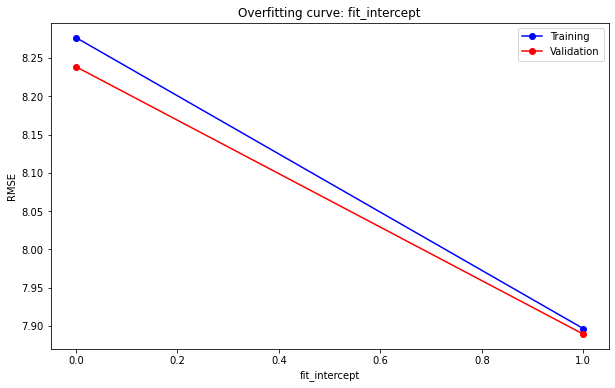

In [33]:
%%time
test_param_and_plot(LinearRegression, 'fit_intercept', [False, True])

Best Parameter: `fit_intercept=True` (default value)

LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1, normalize=True)
Training Errors: [7.896528480775692, 7.896528480775692]
Validation Errors: [7.889295951241035, 7.889295951241035]
CPU times: user 41.2 s, sys: 3.79 s, total: 45 s
Wall time: 4.6 s


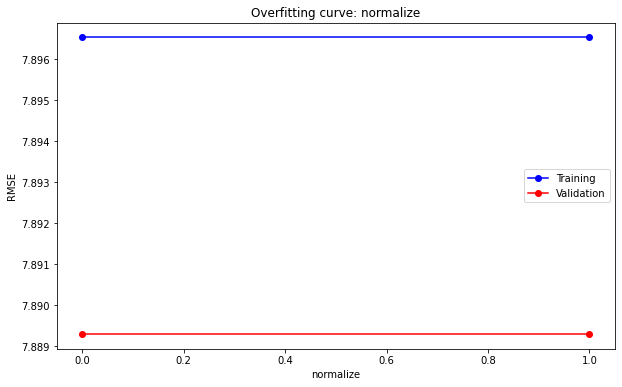

In [34]:
%%time
test_param_and_plot(LinearRegression, 'normalize', [False, True])

Best Paramter: No difference in result, `normalize=False` (default value)

LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1, positive=True)
Training Errors: [7.896528480775692, 7.91828472527628]
Validation Errors: [7.889295951241035, 7.904445138635345]
CPU times: user 24.9 s, sys: 2.47 s, total: 27.3 s
Wall time: 6.03 s


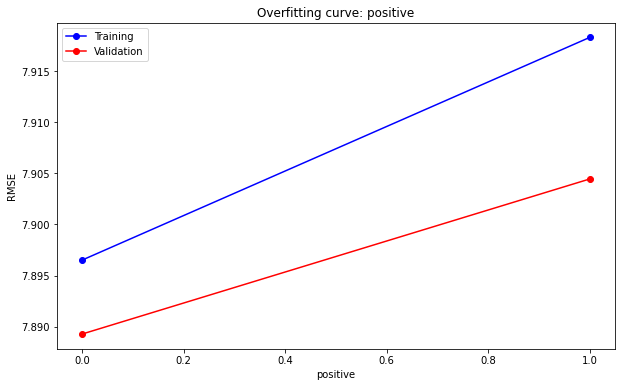

In [35]:
%%time
test_param_and_plot(LinearRegression, 'positive', [False, True])

Best Parameter: `postive=False` (default value)

The LinerRegression Model only has a few parameters that can be tuned. In this case changing the parameters from the default did not improve the model. Our final model will be using the model with the default settings.

**Final Model**

In [36]:
%%time
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

LinearRegression(n_jobs=-1)
Train RMSE: 7.896528480775692, Validation RMSE: 7.889295951241035
CPU times: user 20.2 s, sys: 1.95 s, total: 22.1 s
Wall time: 2.31 s


### Stochastic Gradient Descent

**Default Model**

In [37]:
from sklearn.linear_model import SGDRegressor

In [38]:
%%time
train_rmse, val_rmse = test_params(SGDRegressor)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

SGDRegressor(random_state=42)
Train RMSE: 7.953674708951209, Validation RMSE: 7.942902062055139
CPU times: user 10.7 s, sys: 74.4 ms, total: 10.7 s
Wall time: 10.5 s


**Hyperparameter Tuning**

SGDRegressor(random_state=42)
SGDRegressor(loss='huber', random_state=42)
SGDRegressor(loss='epsilon_insensitive', random_state=42)
SGDRegressor(loss='squared_epsilon_insensitive', random_state=42)
Training Errors: [7.953674708951209, 8.50148132681842, 8.41052612766453, 8.021984871463758]
Validation Errors: [7.942902062055139, 8.467168960230383, 8.383884153238965, 8.010627215246974]
CPU times: user 30.8 s, sys: 1.3 s, total: 32.1 s
Wall time: 27.3 s


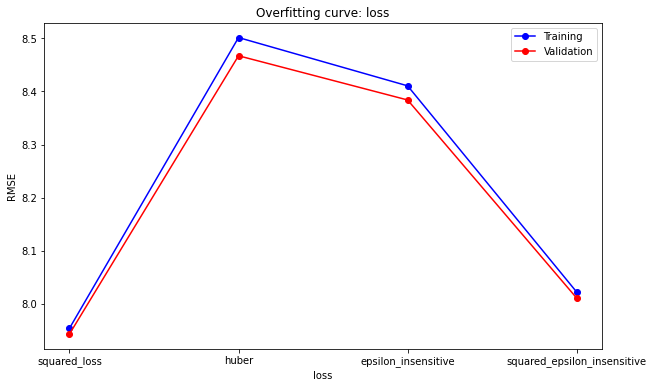

In [39]:
%%time
test_param_and_plot(SGDRegressor, 'loss', 
                    ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'])

Best Parameter: `loss='squared_loss'`

SGDRegressor(learning_rate='constant', random_state=42)
SGDRegressor(learning_rate='optimal', random_state=42)
SGDRegressor(random_state=42)
SGDRegressor(learning_rate='adaptive', random_state=42)
Training Errors: [616065479738.3185, 8.005459901162913, 7.953674708951209, 7.896534700097928]
Validation Errors: [613874645406.6034, 7.995880346411332, 7.942902062055139, 7.889337162781621]
CPU times: user 48.1 s, sys: 1.25 s, total: 49.4 s
Wall time: 44.7 s


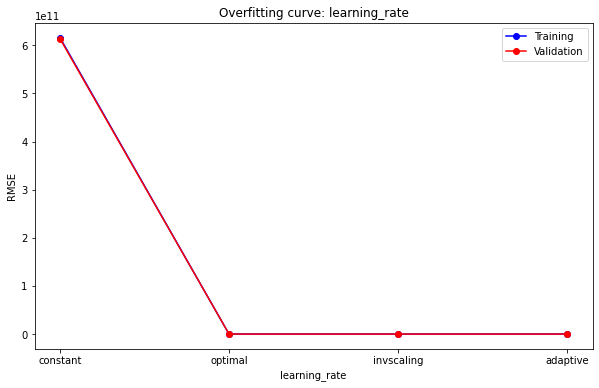

In [40]:
%%time
test_param_and_plot(SGDRegressor, 'learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])

Best Parameter: `learning_rate='adaptive'`

SGDRegressor(random_state=42)
SGDRegressor(penalty='l1', random_state=42)
SGDRegressor(penalty='elasticnet', random_state=42)
Training Errors: [7.953674708951209, 7.94134876620471, 7.940910640082214]
Validation Errors: [7.942902062055139, 7.933627202202626, 7.932929100585803]
CPU times: user 58 s, sys: 929 ms, total: 59 s
Wall time: 55.7 s


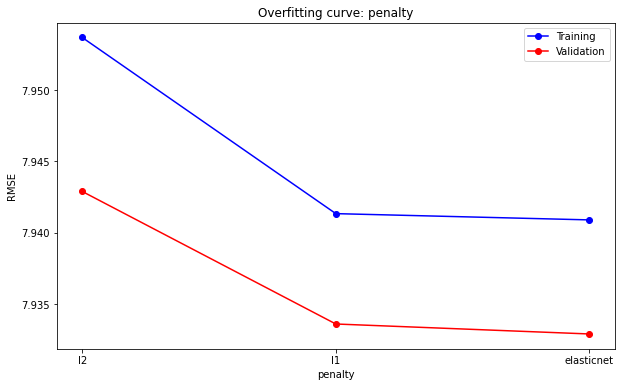

In [41]:
%%time
test_param_and_plot(SGDRegressor, 'penalty', ['l2', 'l1', 'elasticnet'])

Best Parameter: `penalty='elasticnet'`

**Final Model**

In [42]:
%%time
model = SGDRegressor(random_state=42, loss='squared_loss', 
                     learning_rate='adaptive', penalty='elasticnet')
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

SGDRegressor(learning_rate='adaptive', penalty='elasticnet', random_state=42)
Train RMSE: 7.896547211225272, Validation RMSE: 7.889194928066052
CPU times: user 51.9 s, sys: 239 ms, total: 52.2 s
Wall time: 51.9 s


### Decision Tree

**Default Model**

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
%%time
train_rmse, val_rmse = test_params(DecisionTreeRegressor)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

DecisionTreeRegressor(random_state=42)
Train RMSE: 0.0, Validation RMSE: 11.424481082307414
CPU times: user 1min 26s, sys: 284 ms, total: 1min 27s
Wall time: 1min 27s


**Hyperparameter Tuning**

DecisionTreeRegressor(max_depth=1, random_state=42)
DecisionTreeRegressor(max_depth=2, random_state=42)
DecisionTreeRegressor(max_depth=3, random_state=42)
DecisionTreeRegressor(max_depth=4, random_state=42)
DecisionTreeRegressor(max_depth=5, random_state=42)
DecisionTreeRegressor(max_depth=6, random_state=42)
DecisionTreeRegressor(max_depth=7, random_state=42)
DecisionTreeRegressor(max_depth=8, random_state=42)
DecisionTreeRegressor(max_depth=9, random_state=42)
DecisionTreeRegressor(max_depth=10, random_state=42)
Training Errors: [7.937354529366069, 7.931961831665743, 7.926593428128829, 7.920650885264842, 7.912784610883835, 7.902977110265875, 7.889746304358634, 7.873773058875988, 7.855187921983239, 7.830047752460931]
Validation Errors: [7.929433743073557, 7.92444175829745, 7.922646847477582, 7.921435348716421, 7.923523422920108, 7.929569480423027, 7.941911166640267, 7.953259526964098, 7.970071816090072, 7.992427401410132]
CPU times: user 2min 36s, sys: 524 ms, total: 2min 36s
Wall ti

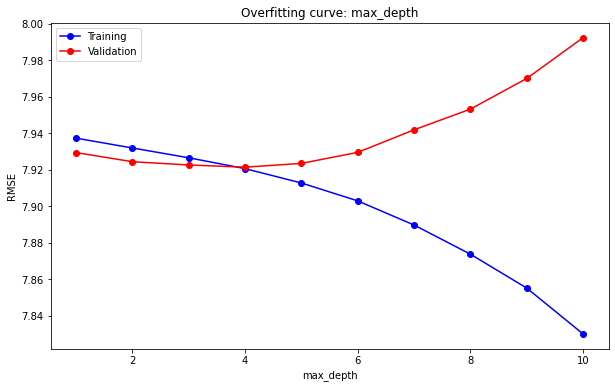

In [45]:
%%time
test_param_and_plot(DecisionTreeRegressor, 'max_depth', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Best Parameter: `max_depth=4`

DecisionTreeRegressor(max_features='sqrt', random_state=42)
DecisionTreeRegressor(max_features='log2', random_state=42)
DecisionTreeRegressor(max_features=0.1, random_state=42)
DecisionTreeRegressor(max_features=0.2, random_state=42)
DecisionTreeRegressor(max_features=0.3, random_state=42)
DecisionTreeRegressor(max_features=0.4, random_state=42)
DecisionTreeRegressor(max_features=0.5, random_state=42)
Training Errors: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Validation Errors: [11.383020337326995, 11.364488549864442, 11.383020337326995, 11.374985186803542, 11.413414563573864, 11.390999253796833, 11.351207160474168]
CPU times: user 2min 26s, sys: 723 ms, total: 2min 27s
Wall time: 2min 27s


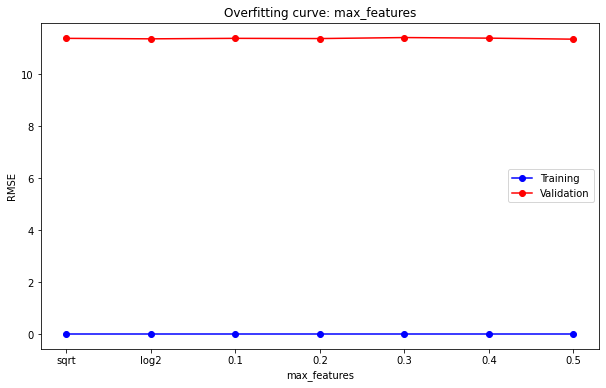

In [46]:
%%time
test_param_and_plot(DecisionTreeRegressor, 'max_features', ['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5])

Best Parameter: `max_features='log2'`

DecisionTreeRegressor(random_state=42)
DecisionTreeRegressor(min_samples_leaf=2, random_state=42)
DecisionTreeRegressor(min_samples_leaf=4, random_state=42)
DecisionTreeRegressor(min_samples_leaf=8, random_state=42)
DecisionTreeRegressor(min_samples_leaf=16, random_state=42)
DecisionTreeRegressor(min_samples_leaf=32, random_state=42)
DecisionTreeRegressor(min_samples_leaf=64, random_state=42)
DecisionTreeRegressor(min_samples_leaf=128, random_state=42)
DecisionTreeRegressor(min_samples_leaf=256, random_state=42)
Training Errors: [0.0, 1.8692586765881283, 3.4898721202750425, 5.1553118293789435, 6.286130865050298, 6.99032885311942, 7.40664689124507, 7.642340261001696, 7.771752525333741]
Validation Errors: [11.424481082307414, 11.173747188039572, 10.711431741149552, 9.926297406319495, 9.234730282390402, 8.68200601796372, 8.364774196116988, 8.149493477982857, 8.019728765722551]
CPU times: user 8min 38s, sys: 1.62 s, total: 8min 39s
Wall time: 8min 39s


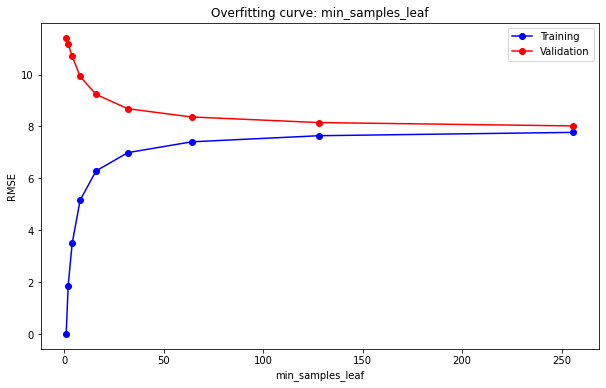

In [47]:
%%time
test_param_and_plot(DecisionTreeRegressor, 'min_samples_leaf', [1, 2, 4, 8, 16, 32, 64, 128, 256])

DecisionTreeRegressor(min_samples_leaf=0.025, random_state=42)
DecisionTreeRegressor(min_samples_leaf=0.05, random_state=42)
DecisionTreeRegressor(min_samples_leaf=0.075, random_state=42)
DecisionTreeRegressor(min_samples_leaf=0.1, random_state=42)
Training Errors: [7.918538567552392, 7.925111355400813, 7.927065806572574, 7.928732228639005]
Validation Errors: [7.926249265459893, 7.923276697490626, 7.924332523455565, 7.924501497924638]
CPU times: user 44 s, sys: 161 ms, total: 44.2 s
Wall time: 44.2 s


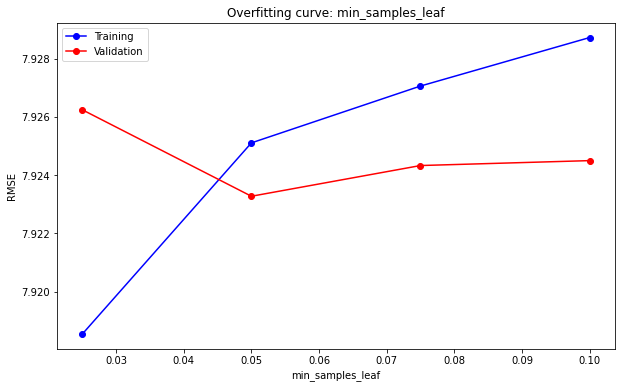

In [48]:
%%time
test_param_and_plot(DecisionTreeRegressor, 'min_samples_leaf', [0.025, 0.05, 0.075, 0.1])

Best Parameter: `min_samples_leaf=0.05`

DecisionTreeRegressor(max_leaf_nodes=2, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=4, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=16, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=32, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=64, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=128, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=256, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=512, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=1024, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=2048, random_state=42)
DecisionTreeRegressor(max_leaf_nodes=4096, random_state=42)
Training Errors: [7.937354529366069, 7.931038941749973, 7.923678162108149, 7.916022407828253, 7.906360119739628, 7.89060184837538, 7.861637801778439, 7.807384633247428, 7.706526669548868, 7.514148670462862, 7.1646101929038455, 6.508166459195918]
Validation Errors: [7.929433743073557, 7.92591547115

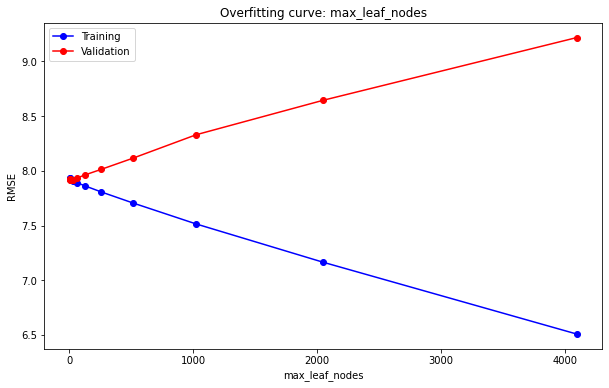

In [49]:
%%time
test_param_and_plot(DecisionTreeRegressor, 'max_leaf_nodes', [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

Best Parameter: `max_leaf_nodes=16`

**Final Model**

In [50]:
%%time
model = DecisionTreeRegressor(random_state=42, max_depth=4, max_features='log2', 
                              min_samples_leaf=0.05, max_leaf_nodes=16)
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

DecisionTreeRegressor(max_depth=4, max_features='log2', max_leaf_nodes=16,
                      min_samples_leaf=0.05, random_state=42)
Train RMSE: 7.935759353667084, Validation RMSE: 7.925849392280029
CPU times: user 813 ms, sys: 17.8 ms, total: 830 ms
Wall time: 828 ms


**Feature Importance**

Since we used a Decision Tree for this model, let's take a look at the feature importance. This information can be useful later on for improving our model with feature engineering.

**Note:** I will not be doing any further feature engineering in this notebook. However, it is interesting information that can help give insight into the data that is being modeled.

In [51]:
from sklearn.tree import export_text

In [52]:
tree_text = export_text(model, feature_names=list(X_train.columns))

In [53]:
print(tree_text)

|--- f28 <= 2.33
|   |--- f65 <= 0.44
|   |   |--- f99 <= -0.05
|   |   |   |--- f7 <= 0.59
|   |   |   |   |--- value: [6.65]
|   |   |   |--- f7 >  0.59
|   |   |   |   |--- value: [6.17]
|   |   |--- f99 >  -0.05
|   |   |   |--- f46 <= -0.25
|   |   |   |   |--- value: [6.52]
|   |   |   |--- f46 >  -0.25
|   |   |   |   |--- value: [6.99]
|   |--- f65 >  0.44
|   |   |--- f52 <= -0.10
|   |   |   |--- value: [7.35]
|   |   |--- f52 >  -0.10
|   |   |   |--- f39 <= 0.25
|   |   |   |   |--- value: [6.58]
|   |   |   |--- f39 >  0.25
|   |   |   |   |--- value: [7.11]
|--- f28 >  2.33
|   |--- value: [7.31]



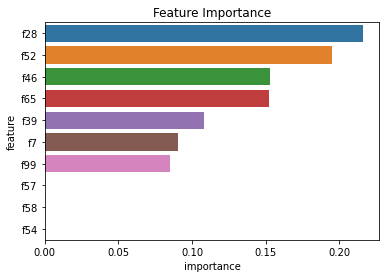

In [54]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Random Forest

**Default Model**

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
%%time
train_rmse, val_rmse = test_params(RandomForestRegressor)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

RandomForestRegressor(n_jobs=-1, random_state=42)
Train RMSE: 2.992252396395286, Validation RMSE: 7.97976489949422
CPU times: user 2h 27min 27s, sys: 47.4 s, total: 2h 28min 14s
Wall time: 7min 34s


**Hyperparameter Tuning**

RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=25, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=30, n_jobs=-1, random_state=42)
RandomForestRegressor(max_depth=35, n_jobs=-1, random_state=42)
Training Errors: [7.903380861822062, 7.7822364632354395, 7.462189452547746, 6.871452867210583, 6.0586728637961915, 5.1746517903451155, 4.374813579037818]
Validation Errors: [7.90995556592929, 7.898718696092999, 7.894247622078712, 7.896624984738076, 7.907247505658777, 7.922429902857165, 7.938120398668363]
CPU times: user 9h 39min 58s, sys: 2min 37s, total: 9h 42min 36s
Wall time: 29min 23s


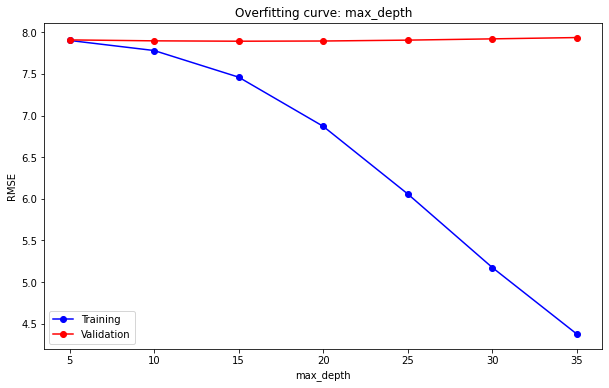

In [57]:
%%time
test_param_and_plot(RandomForestRegressor, 'max_depth', [5, 10, 15, 20, 25, 30, 35])

Best Parameter: `max_depth=15`

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
RandomForestRegressor(n_estimators=600, n_jobs=-1, random_state=42)
Training Errors: [2.9371033229393437, 2.934890247331488]
Validation Errors: [7.94266154641075, 7.941050570380051]
CPU times: user 1d 3h 48min 4s, sys: 8min 4s, total: 1d 3h 56min 8s
Wall time: 1h 16min 32s


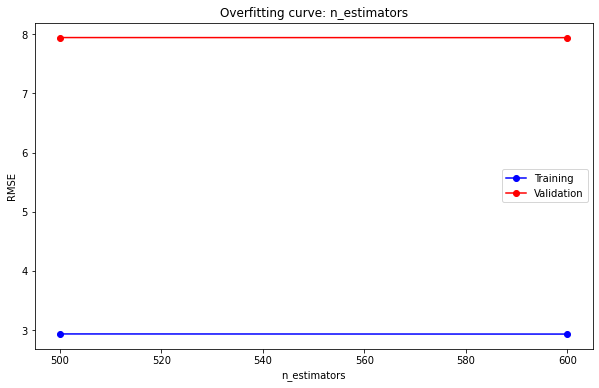

In [58]:
%%time
test_param_and_plot(RandomForestRegressor, 'n_estimators', [500, 600])

Best Parameter: `n_estimators=500`<br>
**Note:** The validation RMSE is still decreasing, but time to run the model is getting significantly longer, so leaving it at 500

RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=42)
RandomForestRegressor(max_features='log2', n_jobs=-1, random_state=42)
RandomForestRegressor(max_features=0.3, n_jobs=-1, random_state=42)
RandomForestRegressor(max_features=0.35, n_jobs=-1, random_state=42)
RandomForestRegressor(max_features=0.4, n_jobs=-1, random_state=42)
RandomForestRegressor(max_features=0.45, n_jobs=-1, random_state=42)
Training Errors: [2.9807489713828637, 2.9792557672904376, 2.985346676730638, 2.9863975850512605, 2.9851205091028854, 2.9867133630575715]
Validation Errors: [7.959572917788995, 7.95173683659111, 7.9693446674616855, 7.964904001530715, 7.970189087342909, 7.971381574608006]
CPU times: user 4h 4min 34s, sys: 1min 52s, total: 4h 6min 27s
Wall time: 13min 21s


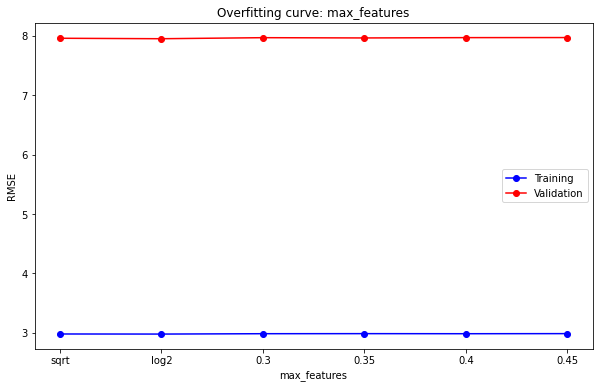

In [59]:
%%time
test_param_and_plot(RandomForestRegressor, 'max_features', ['sqrt', 'log2', 0.3, 0.35, 0.4, 0.45])

Best Parameter: `max_features='log2'`

RandomForestRegressor(max_leaf_nodes=256, n_jobs=-1, random_state=42)
RandomForestRegressor(max_leaf_nodes=512, n_jobs=-1, random_state=42)
RandomForestRegressor(max_leaf_nodes=1024, n_jobs=-1, random_state=42)
Training Errors: [7.72345387375145, 7.555422133678401, 7.250711777225698]
Validation Errors: [7.89396152739916, 7.8926091335707955, 7.893359900523311]
CPU times: user 3h 51min 31s, sys: 1min 13s, total: 3h 52min 45s
Wall time: 12min 27s


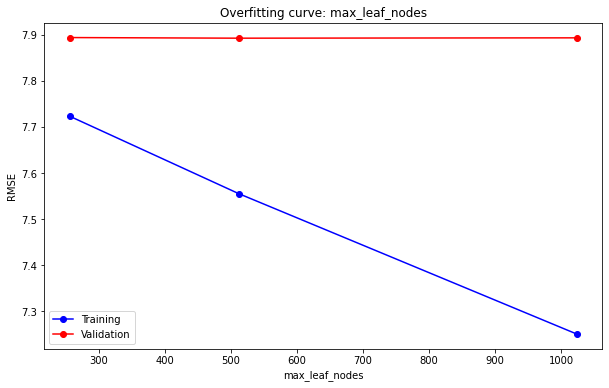

In [60]:
%%time
test_param_and_plot(RandomForestRegressor, 'max_leaf_nodes', [2**8, 2**9, 2**10])

Best Parameter: `max_leaf_nodes=2**9`

RandomForestRegressor(n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=2, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=4, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=8, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=16, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=32, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=64, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=128, n_jobs=-1, random_state=42)
RandomForestRegressor(min_samples_leaf=256, n_jobs=-1, random_state=42)
Training Errors: [2.992252396395286, 3.337528519578868, 4.094926578362209, 5.209056292766732, 6.177360838565211, 6.8652895842404185, 7.309381004230986, 7.578528831616229, 7.732203690094854]
Validation Errors: [7.97976489949422, 7.959918404781672, 7.9343259293255874, 7.911680235958367, 7.892756982477995, 7.883462375944964, 7.881272026761726, 7.880493100977836, 7.883610494704154]
CP

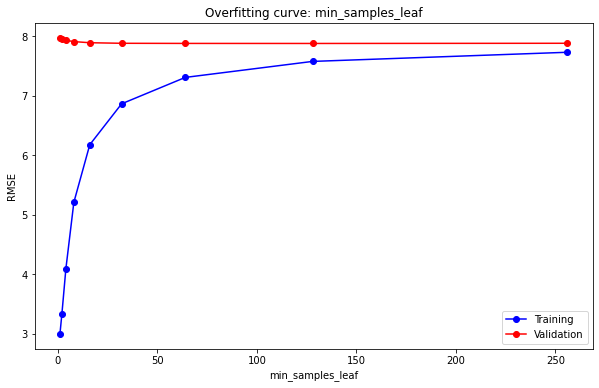

In [61]:
%%time
test_param_and_plot(RandomForestRegressor, 'min_samples_leaf', [1, 2, 4, 8, 16, 32, 64, 128, 256])

Best Parameter: `min_samples_leaf=128`

**Final Model**

In [62]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=15, n_estimators=500, 
                              max_features='log2', max_leaf_nodes=2**9, min_samples_leaf=128)
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

RandomForestRegressor(max_depth=15, max_features='log2', max_leaf_nodes=512,
                      min_samples_leaf=128, n_estimators=500, n_jobs=-1,
                      random_state=42)
Train RMSE: 7.776755941665436, Validation RMSE: 7.89227277630661
CPU times: user 20min 12s, sys: 6.4 s, total: 20min 18s
Wall time: 58.5 s


**Feature Importance**

Let's take a quick look at the important features used by the Random Forest Regressor

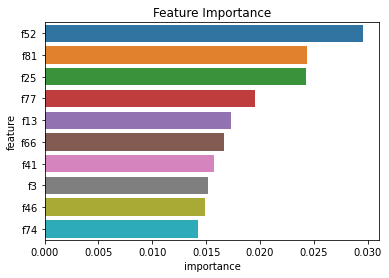

In [63]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### XGBRegressor

**Default Model**

In [64]:
from xgboost import XGBRegressor

In [65]:
%%time
train_rmse, val_rmse = test_params(XGBRegressor)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Train RMSE: 7.283125839252945, Validation RMSE: 7.921048971983086
CPU times: user 23min 26s, sys: 40.1 s, total: 24min 6s
Wall time: 1min 5s


**Hyperparameter Tuning**

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_co

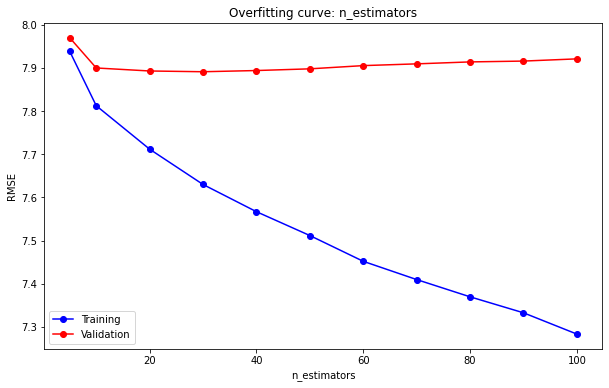

In [67]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

Best Parameter: `n_estimators=30`

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_

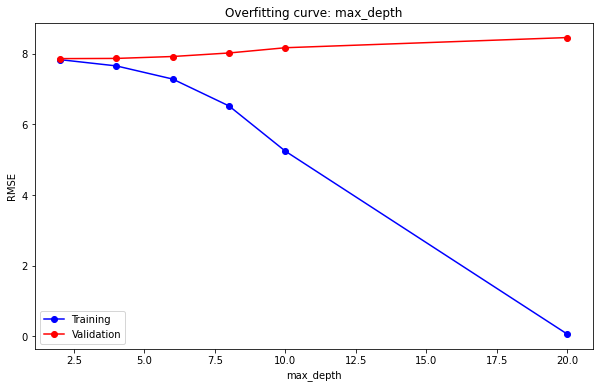

In [68]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [2, 4, 6, 8, 10, 20])

Best Parameter: `max_depth=4`

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()'

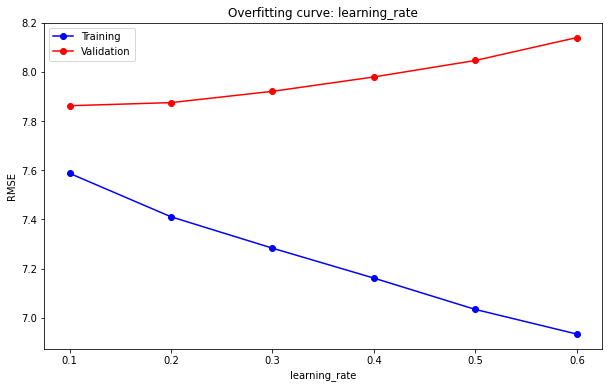

In [69]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

Best Parameter: `learning_rate=0.4`

**Final Model**

In [70]:
%%time
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=30, max_depth=4, learning_rate=0.4)
model.fit(X_train, y_train)
train_rmse = rmse(model.predict(X_train), y_train)
val_rmse = rmse(model.predict(X_val), y_val)
print(model)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
validation_results[repr(model)] = val_rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=30, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Train RMSE: 7.7853816483706275, Validation RMSE: 7.875024101179305
CPU times: user 4min 48s, sys: 11.7 s, total: 5min
Wall time: 14 s


## Best Model

In [71]:
print('Model Scores (Best to Worst)\n')
print('{:<25}{}'.format('Model','RMSE'))
print('=' * 32)
for result in sorted([x for x in validation_results.items()], key=lambda x: x[1]):
    print('{:<23}  {:0.5f}'.format(result[0][:result[0].index('(')] + '()', result[1]))

Model Scores (Best to Worst)

Model                    RMSE
XGBRegressor()           7.87502
SGDRegressor()           7.88919
LinearRegression()       7.88930
RandomForestRegressor()  7.89227
DecisionTreeRegressor()  7.92585
PredictMean()            7.93293


Our best performing model is the XGBRegressor model, we will utilize that model for making a submission to Kaggle.

I do find it interesting that our basic PredictMean() does not do badly in comparison to our Machine Learning models. While I'm not sure exactly what this means in terms of modeling, my thought is that more feature analysis and engineering is needed to tune the models further.

## Model Submission

For my submission to the Kaggle competition, I am going to use our XGBRegressor model with K-Fold validation to make the predictions for the test data.

### XGBRegressor with K-Fold validation

Re-read and regenerate our training data

In [72]:
train_df = pd.read_csv(filedir + '/train.csv')
input_cols, target_col = train_df.columns[1:-1], train_df.columns[-1]
X, y = train_df[input_cols].copy(), train_df[target_col].copy()
scaler = RobustScaler(unit_variance=True).fit(X[:])
X[:] = scaler.transform(X[:])

Run our model with K-Fold validation

In [73]:
import numpy as np
from sklearn.model_selection import KFold

In [74]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [75]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [76]:
%%time
models = []
kfold = KFold(n_splits=10)

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], y.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], y.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, 
                                                     n_estimators=30, 
                                                     max_depth=4, 
                                                     learning_rate=0.4)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 7.79630760366587, Validation RMSE: 7.87656057875267
Train RMSE: 7.800718343238356, Validation RMSE: 7.838418456864163
Train RMSE: 7.795070822072411, Validation RMSE: 7.886869678032039
Train RMSE: 7.803549629049724, Validation RMSE: 7.777064526030632
Train RMSE: 7.795849660769089, Validation RMSE: 7.892562053921021
Train RMSE: 7.790285343889671, Validation RMSE: 7.91759300886665
Train RMSE: 7.791361301047477, Validation RMSE: 7.906154853721187
Train RMSE: 7.790718968857666, Validation RMSE: 7.91994613892625
Train RMSE: 7.785069084979408, Validation RMSE: 7.973227915757571
Train RMSE: 7.802149890162442, Validation RMSE: 7.826434820387789
CPU times: user 59min 27s, sys: 1min 37s, total: 1h 1min 4s
Wall time: 2min 44s


In [77]:
print('Validation RMSE: {}'.format(rmse(predict_avg(models, X), y)))

Validation RMSE: 7.787314931544966


Utilizing K-Fold validation has allowed us to bring our Validation RMSE value down to 7.78731 from 7.87502 which is a about a 2% improvement in score. 

### Kaggle Submission

Read the test.csv data and apply our feature engineering to the data

In [78]:
test_df = pd.read_csv(filedir + '/test.csv')
test_df = test_df[test_df.columns[1:]].copy()
test_df[:] = scaler.transform(test_df[:])

Generate our predictions

In [79]:
test_preds = predict_avg(models, test_df)

Create `submission.csv`

In [80]:
submission_df = pd.read_csv(filedir + '/sample_submission.csv')
submission_df['loss'] = test_preds
submission_df.to_csv('submission.csv', index=False)

Submit `submission.csv` to the Kaggle [Competition](https://www.kaggle.com/c/tabular-playground-series-aug-2021/submit)

>**Submission Score:** 7.90836<br>
>Rank at time of Submission 170 of 357

Our submission score was in the top 50% of scores at the time of submission. As the competition progresses, that position will drop as submissions with better scores are submitted. However, without going into techniques and modeling not discussed in the course, I feel that it was a very respectable score.

As a quick note, at time of submission, the top score on the leaderboard was 7.86876 which is a 1.5% improvement on my score. So our model is definitely in the ball park for predicting the loss value for the data provided.

## Conclusion

Overall, the course has been an excellent introduction to the Machine Learning models in the scikit-learn library. As far as future work, I would like to try to improve my scoring higher. 

From my observations, I believe that more analysis of the features and more feature engineering will help. Additionally there are libraries such as Optuna that perform hyperparameter optimization to be explored as well. 

Another possible approach would be to use the skills I learned in the [Deep Learning with PyTorch: Zero to GANs](https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans) Course taught by Jovian.ai and create a deep learning model to see how it performs.

## Acknowledgements and Reference

First and foremostly, I would like to thank [Aakash N S](https://twitter.com/aakashns/) for teaching multiple courses on Machine Learning and Python. It has helped me tremendously in my growth as a Computer Scientist.

I utilized the following references when creating my models:
* Course and Assignment Notebooks from [Machine Learning with Python: Zero to GBMs](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms) for reference and guidance
* [Transformation and Scaling of Numeric Data](https://jovian.ai/satyamtiwari1920/transformation-and-scaling-of-numeric-data) by [Satyam Tiwari](https://jovian.ai/satyamtiwari1920) for a better understanding of the Scalers offered in scikit-learn
* [The problem and target definition + what is loan default and loss given default?](https://www.kaggle.com/c/tabular-playground-series-aug-2021/discussion/256337) by [ibexorigin](https://www.kaggle.com/bextuychiev) for a deeper understanding of the Kaggle Competition dataset
* [scikit-learn API documentation](https://scikit-learn.org/stable/modules/classes.html)

### Saving to Jovian

In [81]:
import jovian

In [82]:
jovian.commit(privacy='secret', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fuzzyray/kaggle-tps-august-2021" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/fuzzyray/kaggle-tps-august-2021


'https://jovian.ai/fuzzyray/kaggle-tps-august-2021'

In [ ]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>